## PAN-CANCER RNA-SEQUENCE ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import gc

# This collection of data is part of the RNA-Seq (HiSeq) PANCAN data set, it is a random extraction of gene expressions of patients having different types of tumor: BRCA, KIRC, COAD, LUAD and PRAD

In [2]:
gc.enable()

In [3]:
# url: https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq
sc_df = pd.read_csv("data.csv", sep = ',', skiprows = 1, header = None, index_col = False)
# index_col = False is required to get rid of extra column that is created during reading csv. Transpose becomes easy!
sc_df.shape

(801, 20532)

In [4]:
labels = pd.read_csv("labels.csv", sep = ',', skiprows = 1, header = None, index_col = False)

In [5]:
labels.head()

,0,1
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [6]:
labels.shape

(801, 2)

In [7]:
sc_df = pd.concat([labels, sc_df], axis = 1)


In [8]:
sc_df.shape

(801, 20534)

In [9]:
sc_df.head()

,0,1,0,1,2,3,4,5,6,7,...,20522,20523,20524,20525,20526,20527,20528,20529,20530,20531
0,sample_0,PRAD,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,LUAD,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,PRAD,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,PRAD,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,BRCA,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [10]:
"""for col in sc_df.columns:
    print(col)"""

'for col in sc_df.columns:\n    print(col)'

In [11]:
titles = [x for x in range(1, 20535)]
sc_df.columns = titles
sc_df.head()

,1,2,3,4,5,6,7,8,9,10,...,20525,20526,20527,20528,20529,20530,20531,20532,20533,20534
0,sample_0,PRAD,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,LUAD,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,PRAD,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,PRAD,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,BRCA,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [12]:
sc_df = sc_df.drop(columns = 1)

In [13]:
sc_df = sc_df.drop(columns = 3)

In [14]:
sc_df.head()

,2,4,5,6,7,8,9,10,11,12,...,20525,20526,20527,20528,20529,20530,20531,20532,20533,20534
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [15]:
titles = [x for x in range(0, 20532)]
titles[0] = 'Sample_ID'
sc_df.columns = titles
sc_df.head()

,Sample_ID,1,2,3,4,5,6,7,8,9,...,20522,20523,20524,20525,20526,20527,20528,20529,20530,20531
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [16]:
sc_df.shape
# 800 cells with 20531 dimensions

(801, 20532)

In [17]:
sc_df.groupby('Sample_ID').count()


,1,2,3,4,5,6,7,8,9,10,...,20522,20523,20524,20525,20526,20527,20528,20529,20530,20531
Sample_ID,,,,,,,,,,,,,,,,,,,,,
BRCA,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300
COAD,78,78,78,78,78,78,78,78,78,78,...,78,78,78,78,78,78,78,78,78,78
KIRC,146,146,146,146,146,146,146,146,146,146,...,146,146,146,146,146,146,146,146,146,146
LUAD,141,141,141,141,141,141,141,141,141,141,...,141,141,141,141,141,141,141,141,141,141
PRAD,136,136,136,136,136,136,136,136,136,136,...,136,136,136,136,136,136,136,136,136,136


In [ ]:
#sc_df.groupby('Sample_ID').describe()

In [18]:
sc_df.isnull().values.any()

False

In [19]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 2 columns):
0    801 non-null object
1    801 non-null object
dtypes: object(2)
memory usage: 12.6+ KB


In [20]:
sc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Sample_ID to 20531
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [21]:
del [labels]
gc.collect()

7

In [22]:
# labels.info()

In [23]:
X = sc_df.drop(["Sample_ID"], axis = 1)

In [24]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,20522,20523,20524,20525,20526,20527,20528,20529,20530,20531
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [25]:
y = sc_df['Sample_ID']
y.head()

0    PRAD
1    LUAD
2    PRAD
3    PRAD
4    BRCA
Name: Sample_ID, dtype: object

# Preprocessing

In [26]:
from sklearn import preprocessing
scaled_df = preprocessing.scale(X) # Scale dataset before passing to models

In [28]:
pca = PCA(n_components=3) # call an instance of PCA with 3 components

In [29]:
pca.fit(scaled_df) # Fit scaled data to PCA model

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
pca_data = pca.transform(scaled_df) # since only one dataset (not training and test), transform back to original data

In [31]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1) # variance values in percentages
# per_var

In [32]:
len(per_var)

3

In [33]:
var_labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)] # Prepare labels for the PCA components
# var_labels[0:5]

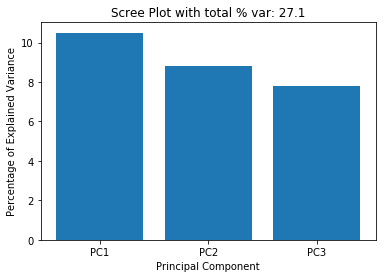

In [34]:
plt.bar(x = range(1, len(per_var)+1), height = per_var, tick_label = var_labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel('Principal Component')
plt.title('Scree Plot with total % var: ' + str(round(sum(per_var), 2)))
plt.show()

In [35]:
pca_df = pd.DataFrame(pca_data.astype(float), index = y, columns = var_labels)
# pca_df.insert(0, [y], True)
pca_df.head()


,PC1,PC2,PC3
Sample_ID,,,
PRAD,-57.446987,95.410981,74.301543
LUAD,-16.919430,0.732470,-64.072900
PRAD,-70.345218,-19.303327,20.488240
PRAD,-49.161591,-9.227586,61.243771
BRCA,-18.132534,-51.327797,16.598116


In [36]:
"""pca_df = pd.concat([y, pca_df], axis = 1)
pca_df.columns =['Sample_ID', 'PC1', 'PC2', 'PC3']"""

"pca_df = pd.concat([y, pca_df], axis = 1)\npca_df.columns =['Sample_ID', 'PC1', 'PC2', 'PC3']"

In [37]:

pca_df.shape

(801, 3)

In [37]:
"""pca_df['Sample_ID'].replace(['PRAD', 'LUAD', 'BRCA', 'COAD', 'KIRC'], 
                            ['blue', 'green', 'red', 'pink', 'gray'], inplace = True)"""

"pca_df['Sample_ID'].replace(['PRAD', 'LUAD', 'BRCA', 'COAD', 'KIRC'], \n                            ['blue', 'green', 'red', 'pink', 'gray'], inplace = True)"

In [ ]:
import seaborn as sns; sns.set(color_codes=True)
species = sc_df.pop("Sample_ID")
g = sns.clustermap(sc_df)

In [38]:
colors = []
for sample in pca_df.index:
    if sample == "PRAD":
        colors.append('blue')
    elif sample == "LUAD":
        colors.append('red')
    elif sample == 'BRCA':
        colors.append('green')
    elif sample == "COAD":
        colors.append('purple')
    else:
        colors.append('gray') # gray is the KIRC group
print(len(colors), colors[1:5])

801 ['red', 'blue', 'blue', 'green']


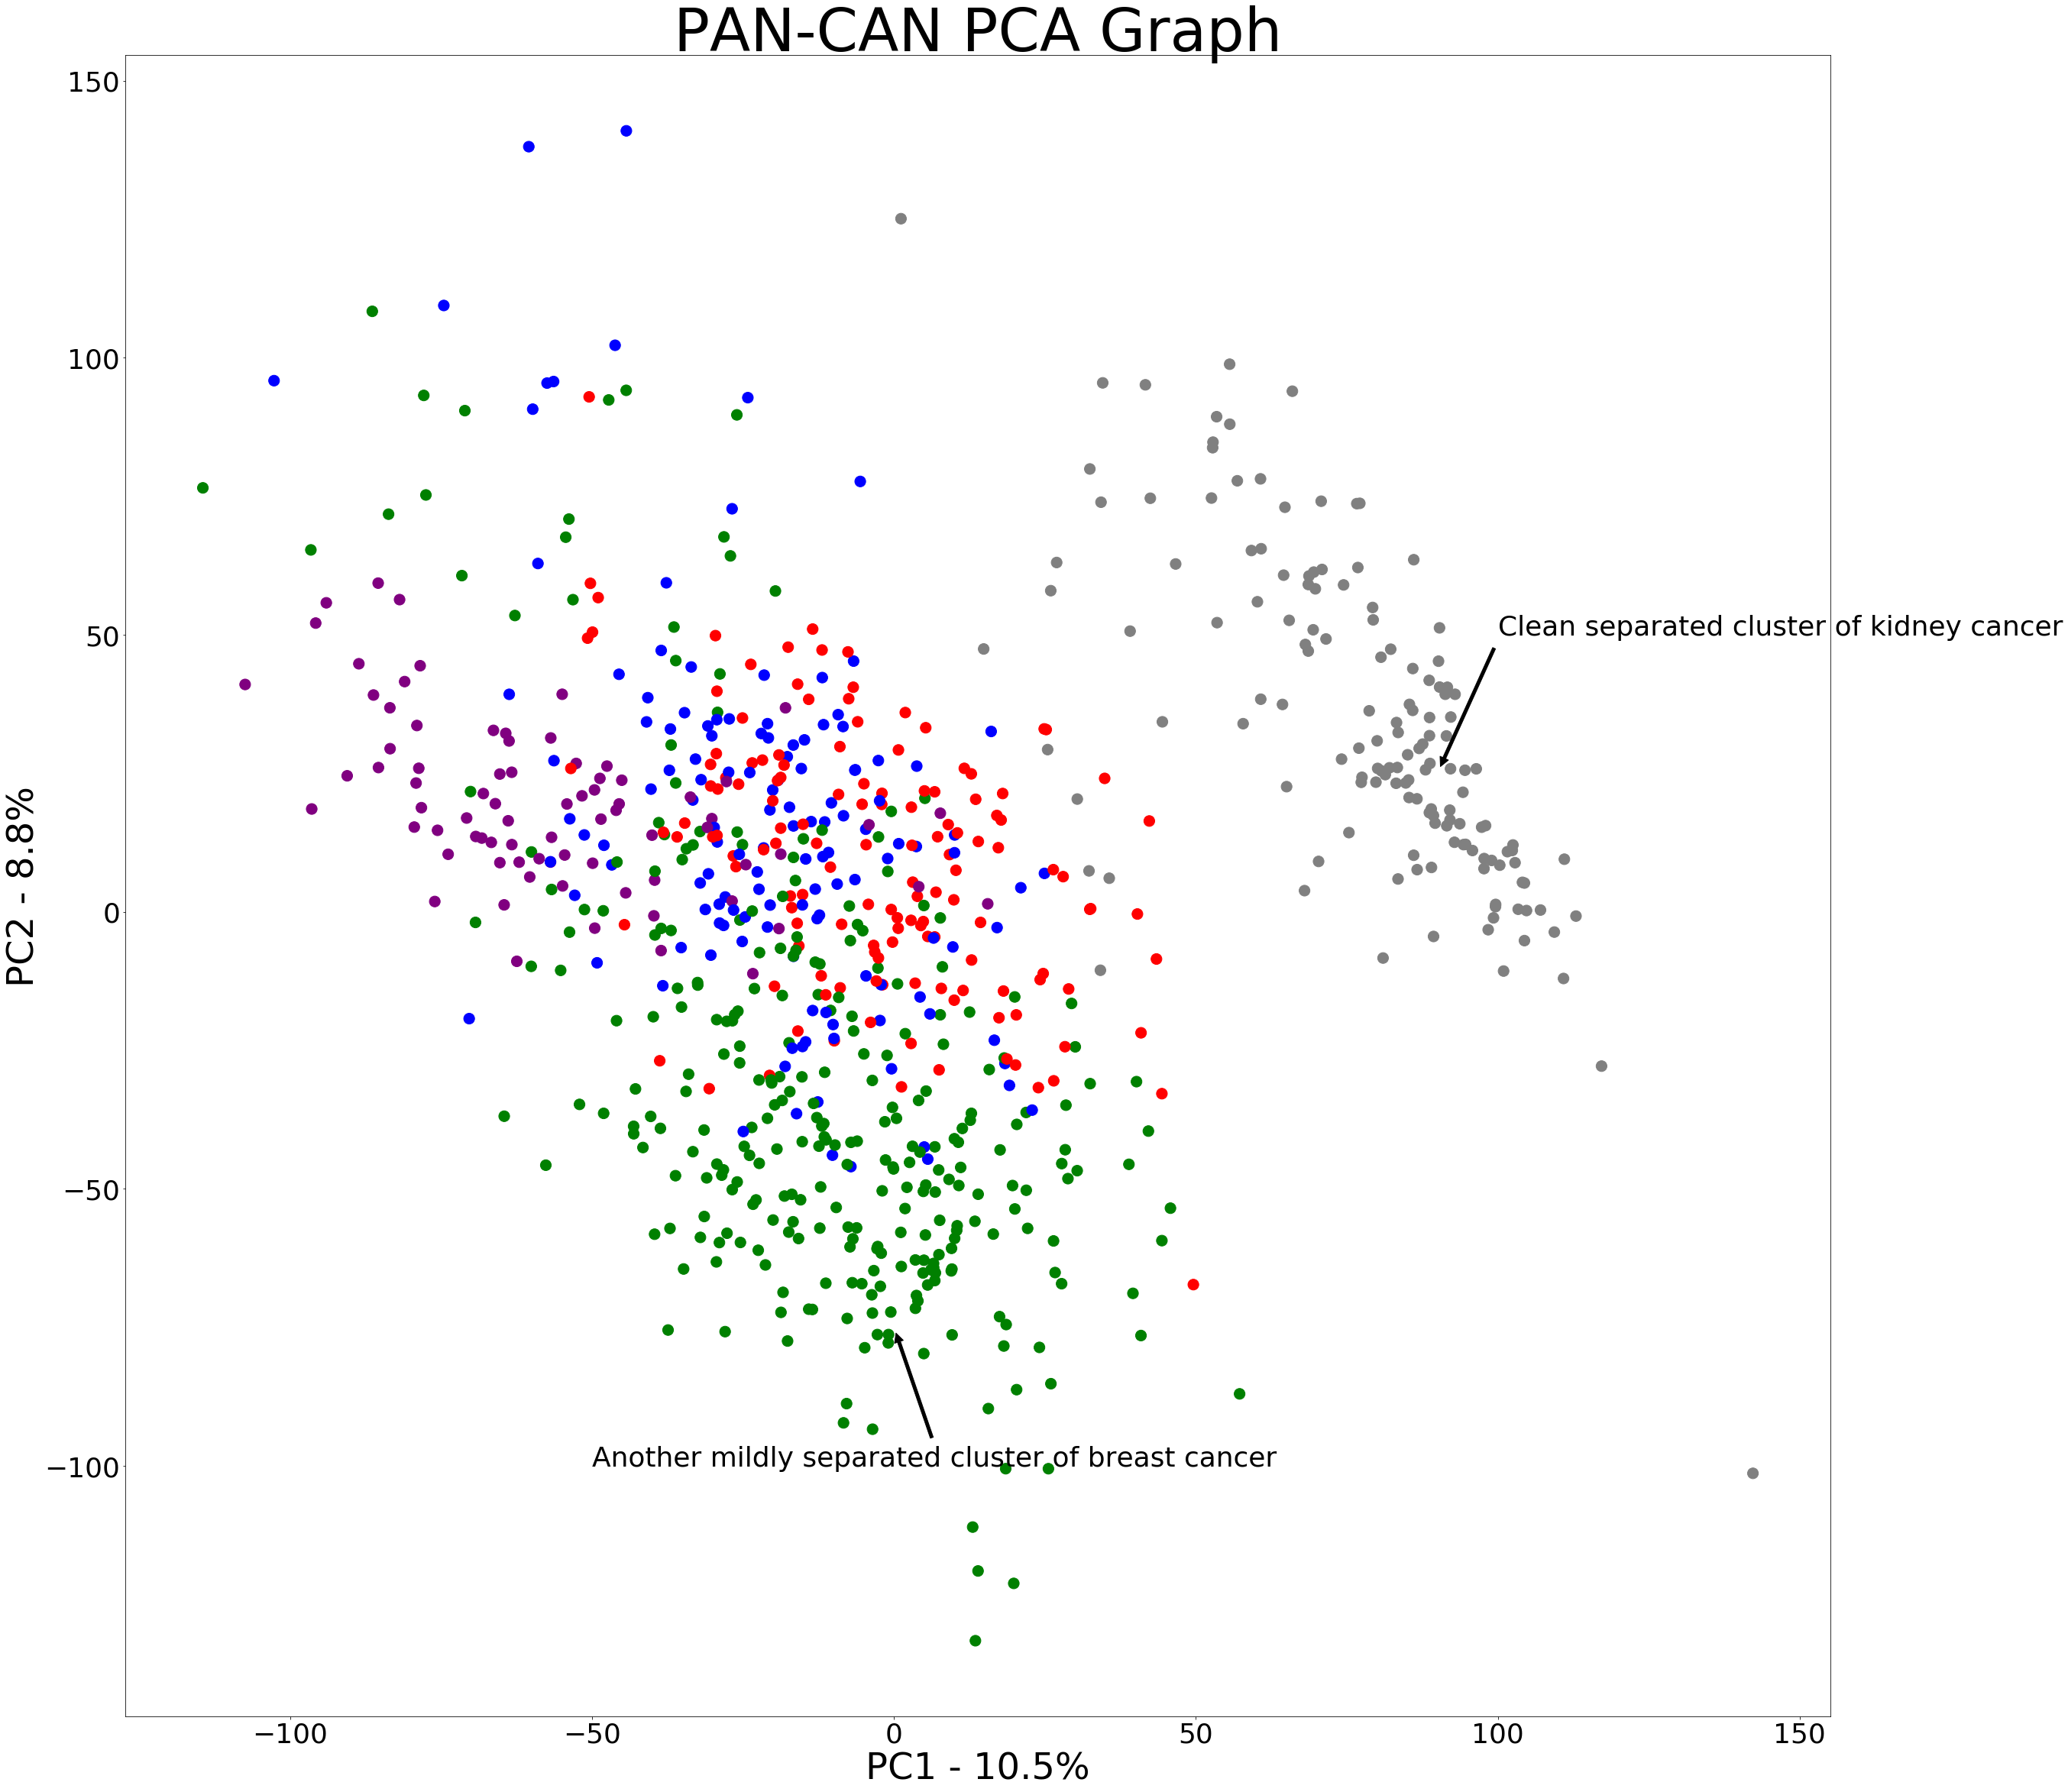

In [39]:
plt.figure(figsize=(40,40))
plt.scatter(pca_df.PC1, pca_df.PC2, c = colors, s = 200)
plt.title("PAN-CAN PCA Graph", size = 78)
plt.xlabel('PC1 - {0}%'.format(per_var[0]), size = 48)
plt.ylabel('PC2 - {0}%'.format(per_var[1]), size = 48)
plt.xticks(fontsize=36)
plt.yticks(fontsize = 36)
plt.annotate('Clean separated cluster of kidney cancer',xy=(90,25),xytext=(100,50),size=36, arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Another mildly separated cluster of breast cancer',xy=(0,-75),xytext=(-50,-100),size=36, arrowprops=dict(facecolor='black', shrink=0.05))

"""for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], 
                          pca_df.PC2.loc[sample]))"""
plt.show()

[]

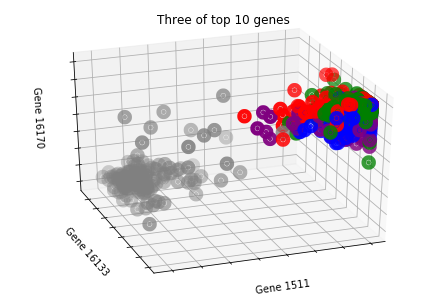

In [40]:
from sklearn.decomposition import PCA as sklearnPCA

from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure(1)
figsize=(200,200)
ax = Axes3D(fig, elev=-150, azim=110,)

ax.scatter(sc_df[1511], sc_df[16133], sc_df[16170], c = colors, cmap=plt.cm.Paired,linewidths=10)
ax.set_title("Three of top 10 genes")
ax.set_xlabel("Gene 1511")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Gene 16133")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Gene 16170")
ax.w_zaxis.set_ticklabels([])

[]

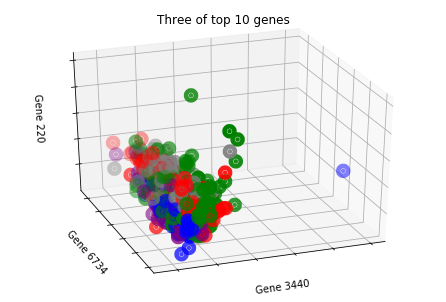

In [41]:
plt.clf()
fig = plt.figure(1)
figsize=(200,200)
ax = Axes3D(fig, elev=-150, azim=110,)

ax.scatter(sc_df[51], sc_df[50], sc_df[49], c = colors, cmap=plt.cm.Paired,linewidths=10)
ax.set_title("Three of top 10 genes")
ax.set_xlabel("Gene 3440")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Gene 6734")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Gene 220")
ax.w_zaxis.set_ticklabels([])

In [42]:
"""for sample in pca_df.index:
    print(pca_df.PC2.loc[sample]) """ 
                       

'for sample in pca_df.index:\n    print(pca_df.PC2.loc[sample]) '

In [43]:
loading_scores = pd.Series(pca.components_[0], index = titles[1:20533])
sorted_loading_scores = loading_scores.abs().sort_values(ascending = False)
top_10_genes = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])

# which genes impacted highly the separation of clusters? All relatively similar contributions

19863    0.019002
17361    0.018985
13490    0.018966
15159    0.018777
7032     0.018740
7020     0.018657
10789    0.018629
13508   -0.018624
6544     0.018595
2289    -0.018592
dtype: float64


In [44]:
bottom_10_genes = sorted_loading_scores[20521:20532].index.values
bottom_10_genes

array([16822, 16833, 16823, 16824, 16825, 16827, 16828, 16831, 16832,
       16909])

In [45]:
print('Gene', 'Expression value')
for gene in top_10_genes:
    print(gene, round(sc_df[gene].sum(), 2))

# Potential biomarkers!? - for KIRC

Gene Expression value
19863 7434.0
17361 6149.59
13490 7501.12
15159 6751.08
7032 8160.61
7020 6446.48
10789 7281.58
13508 7423.0
6544 8287.83
2289 4705.59


In [46]:
print('Gene', 'Expression value')
for gene in bottom_10_genes:
    print(gene, sc_df[gene].sum())

Gene Expression value
16822 0.0
16833 0.0
16823 0.0
16824 0.0
16825 0.0
16827 0.0
16828 0.0
16831 0.0
16832 0.0
16909 0.0


In [47]:
for gene in top_10_genes:
    print(gene)

19863
17361
13490
15159
7032
7020
10789
13508
6544
2289


In [48]:
len(loading_scores)

20531

In [49]:
"""count = 0
for sample in sc_df['Sample_ID']:
    if sample == 'KIRC':
        for gene in top_10_genes:
            if gene == 3440:
                count += sc_df[gene].sum()
print(round(count,2))"""

"count = 0\nfor sample in sc_df['Sample_ID']:\n    if sample == 'KIRC':\n        for gene in top_10_genes:\n            if gene == 3440:\n                count += sc_df[gene].sum()\nprint(round(count,2))"

In [50]:
"""import networkx as nx

import plotly.plotly as py
from plotly.graph_objs import *

x = sc_df.loc[sc_df[3440, 6734, 440]].values
labels = y.values

G=nx.Graph()
G.add_weighted_edges_from(x)

pos=nx.spring_layout(G)

edge_trace = Scatter(x=[], y=[], mode='lines')
for edge in G.edges():
    x0, y0 = pos[edge[0]] 
    x1, y1 = pos[edge[1]] 
    edge_trace['x'] += [x0, x1, None]
    edge_trace['y'] += [y0, y1, None]

node_trace = Scatter(x=[], y=[], mode='markers+text',
                     text=G.nodes(),
                     textposition='top',
                     marker=Marker(size=10))
for node in G.nodes():
    x, y = pos[node]
    node_trace['x'].append(x)
    node_trace['y'].append(y)
   
fig = Figure(data=Data([edge_trace, node_trace]),
             layout=Layout(title='AINX_HUMAN interaction network',
                           showlegend=False, xaxis=XAxis(showgrid=False, zeroline=False, showticklabels=False),
                           yaxis=YAxis(showgrid=False, zeroline=False, showticklabels=False)))

py.iplot(fig)"""

"import networkx as nx\n\nimport plotly.plotly as py\nfrom plotly.graph_objs import *\n\nx = sc_df.loc[sc_df[3440, 6734, 440]].values\nlabels = y.values\n\nG=nx.Graph()\nG.add_weighted_edges_from(x)\n\npos=nx.spring_layout(G)\n\nedge_trace = Scatter(x=[], y=[], mode='lines')\nfor edge in G.edges():\n    x0, y0 = pos[edge[0]] \n    x1, y1 = pos[edge[1]] \n    edge_trace['x'] += [x0, x1, None]\n    edge_trace['y'] += [y0, y1, None]\n\nnode_trace = Scatter(x=[], y=[], mode='markers+text',\n                     text=G.nodes(),\n                     textposition='top',\n                     marker=Marker(size=10))\nfor node in G.nodes():\n    x, y = pos[node]\n    node_trace['x'].append(x)\n    node_trace['y'].append(y)\n   \nfig = Figure(data=Data([edge_trace, node_trace]),\n             layout=Layout(title='AINX_HUMAN interaction network',\n                           showlegend=False, xaxis=XAxis(showgrid=False, zeroline=False, showticklabels=False),\n                           yaxis=YAxi

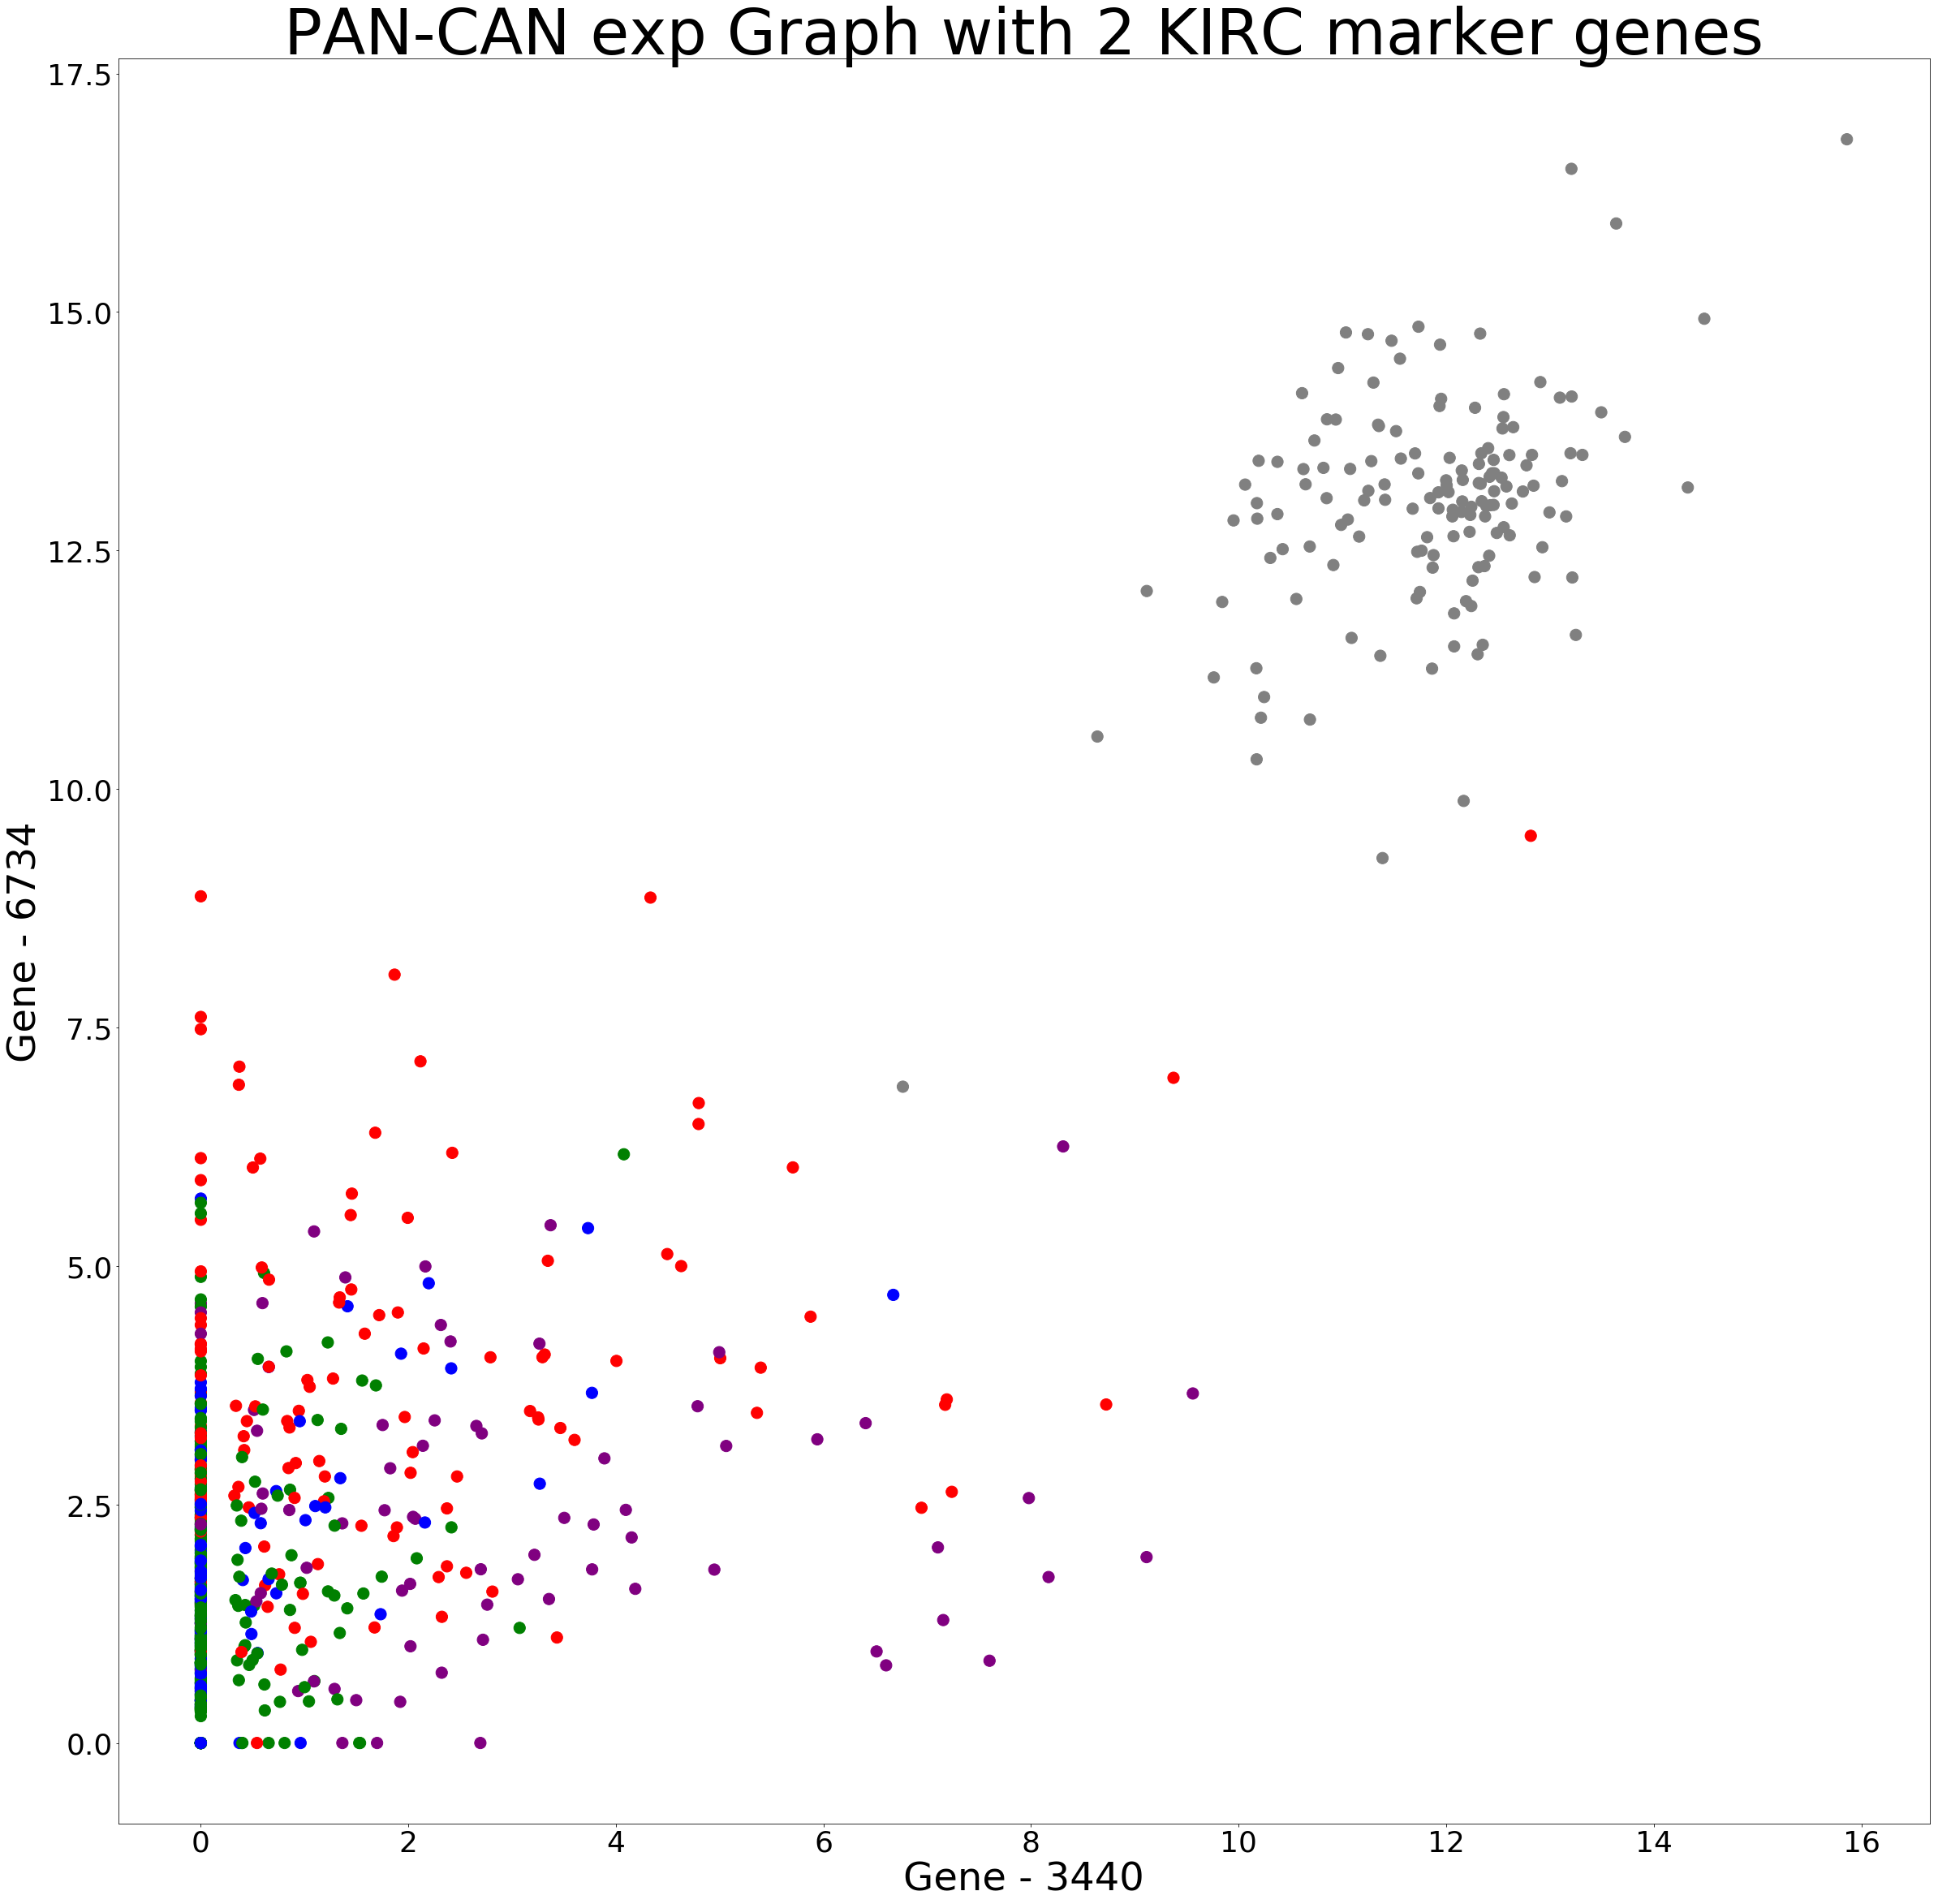

In [51]:
plt.figure(figsize=(40,40))
plt.scatter(sc_df[3440], sc_df[6734], c = colors, s = 200)
plt.title("PAN-CAN exp Graph with 2 KIRC marker genes", size = 78)
plt.xlabel('Gene - 3440', size = 48)
plt.ylabel('Gene - 6734', size = 48)
plt.xticks(fontsize=36)
plt.yticks(fontsize = 36)
#plt.annotate('See this separated cluster',xy=(90,25),xytext=(100,50),size=36, arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

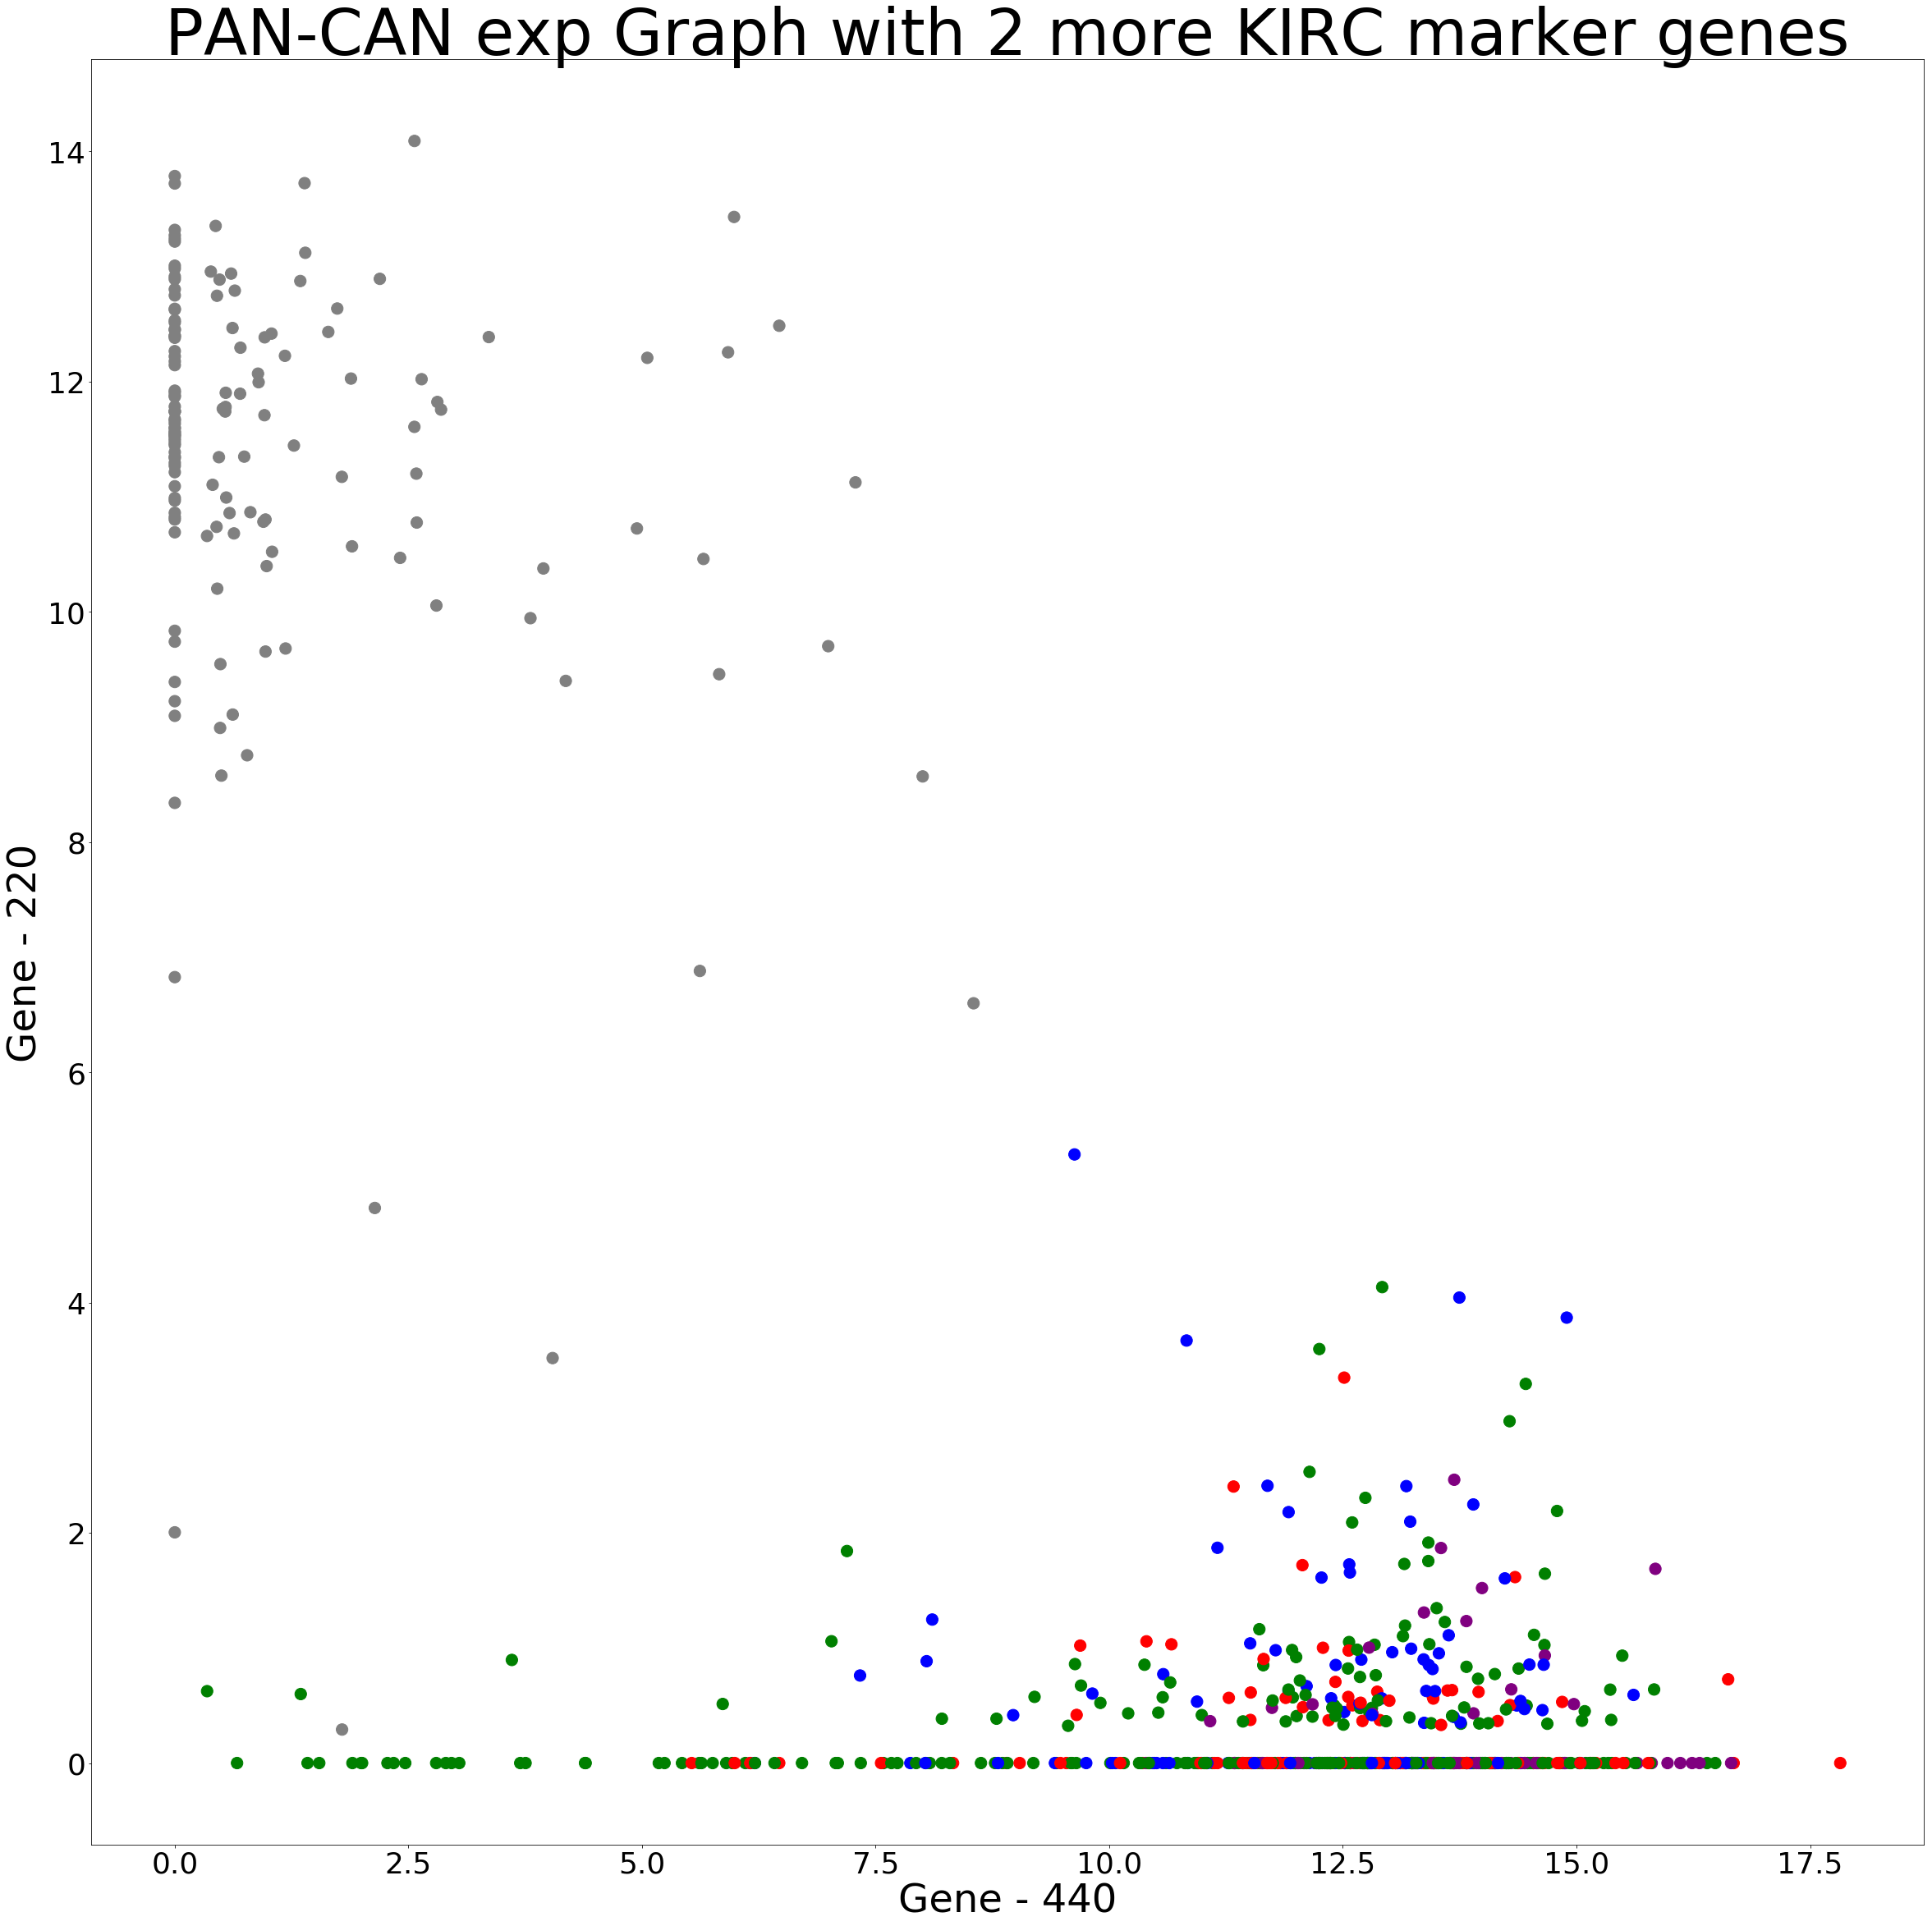

In [52]:
# 9305,  9307
plt.figure(figsize=(40,40))
plt.scatter(sc_df[440], sc_df[220], c = colors, s = 200)
plt.title("PAN-CAN exp Graph with 2 more KIRC marker genes", size = 78)
plt.xlabel('Gene - 440', size = 48)
plt.ylabel('Gene - 220', size = 48)
plt.xticks(fontsize=36)
plt.yticks(fontsize = 36)
#plt.annotate('See this separated cluster',xy=(90,25),xytext=(100,50),size=36, arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

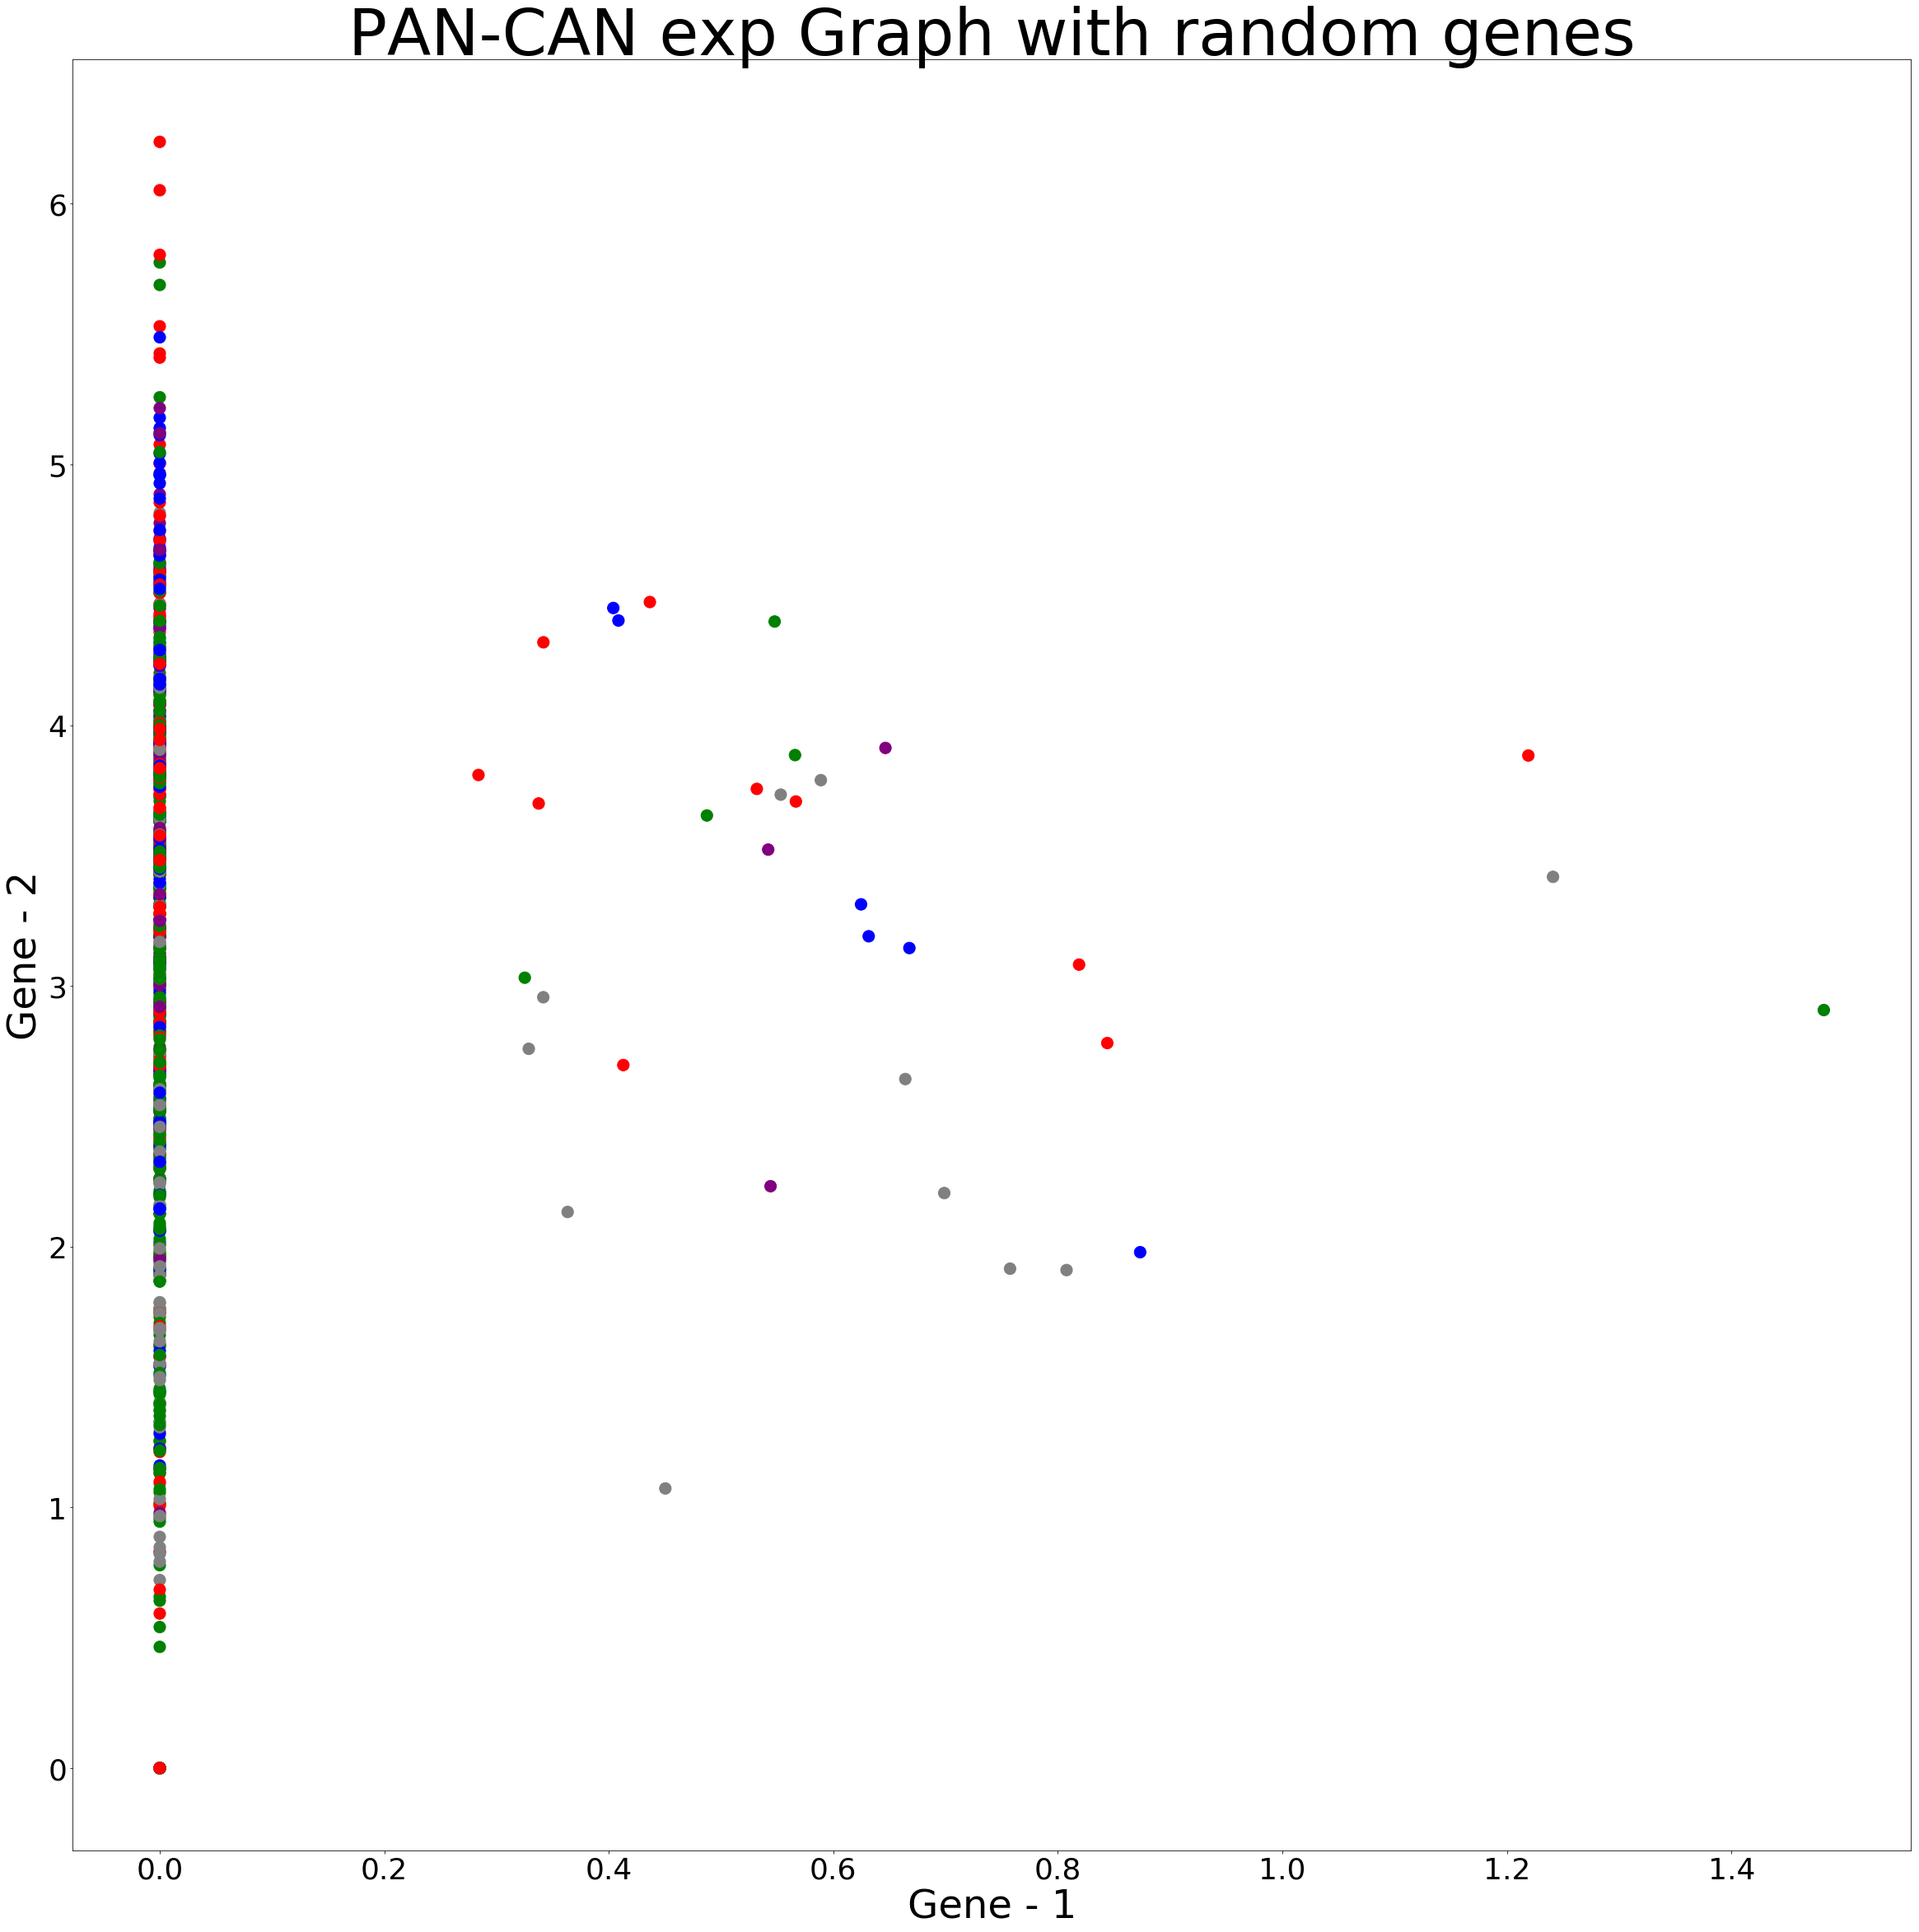

In [53]:
plt.figure(figsize=(40,40))
plt.scatter(sc_df[1], sc_df[2], c = colors, s = 200)
plt.title("PAN-CAN exp Graph with random genes", size = 78)
plt.xlabel('Gene - 1', size = 48)
plt.ylabel('Gene - 2', size = 48)
plt.xticks(fontsize=36)
plt.yticks(fontsize = 36)
#plt.annotate('See this separated cluster',xy=(90,25),xytext=(100,50),size=36, arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

[]

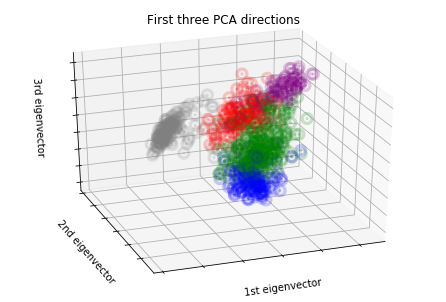

In [54]:
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(pca_df.PC1, pca_df.PC2, pca_df.PC3, c = colors, s = 10, cmap=plt.cm.Paired,linewidths=10, alpha = 0.2)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

In [55]:
print('KIRC (Kidney Renal Clear Cell Carcinoma) counts marked in gray:', colors.count('gray'))
print('COAD (Colon adenocarcinoma) counts in purple:', colors.count('purple'))
print('BRCA (Breast invasive carcinoma) counts in green:', colors.count('green'))
print('LUAD (Lung adenocarcinoma) counts in red:', colors.count('red'))
print('PRAD (Prostate adenocarcinoma) counts in blue:', colors.count('blue'))
print(146+78+300+141+136)

KIRC (Kidney Renal Clear Cell Carcinoma) counts marked in gray: 146
COAD (Colon adenocarcinoma) counts in purple: 78
BRCA (Breast invasive carcinoma) counts in green: 300
LUAD (Lung adenocarcinoma) counts in red: 141
PRAD (Prostate adenocarcinoma) counts in blue: 136
801


# Run K-means clustering

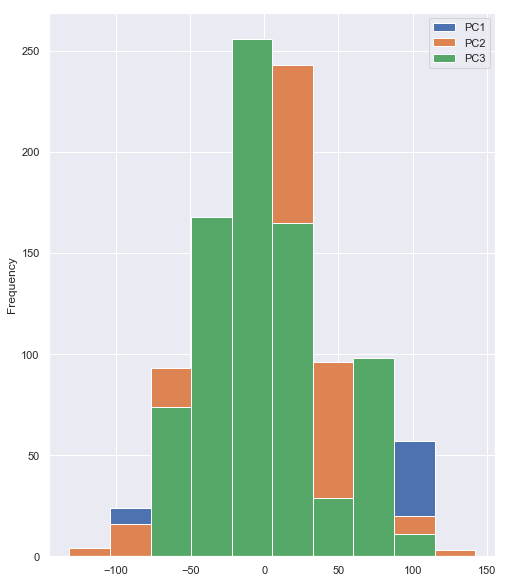

In [63]:
pca_df.plot(kind='hist',figsize=(8,10))


In [64]:
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier(n_neighbors=10,)
clf.fit(pca_df,pca_df.index)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [65]:
pred = clf.predict(pca_df)
import sklearn
sklearn.metrics.confusion_matrix(y, pred)

array([[285,   3,   0,  11,   1],
       [  1,  64,   0,  13,   0],
       [  0,   0, 140,   6,   0],
       [ 12,   6,   0, 123,   0],
       [  6,   0,   0,   0, 130]])

In [66]:
from sklearn import svm

svm_clf=svm.SVC(kernel='linear')
svm_clf.fit(pca_df, y)
svm_pred = svm_clf.predict(pca_df)

print(sklearn.metrics.confusion_matrix(y, svm_pred))
print()

[[277   3   0  18   2]
 [  3  61   0  14   0]
 [  1   0 140   5   0]
 [ 12   4   2 123   0]
 [  6   0   0   0 130]]



In [67]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier(min_samples_split=2)
dtc_clf.fit(pca_df, y)
dtc_pred = dtc_clf.predict(pca_df)
print(sklearn.metrics.confusion_matrix(y, dtc_pred))
print()

[[300   0   0   0   0]
 [  0  78   0   0   0]
 [  0   0 146   0   0]
 [  0   0   0 141   0]
 [  0   0   0   0 136]]



In [69]:
dtc_clf_original = DecisionTreeClassifier(min_samples_split=2)
dtc_clf_original.fit(X, y)
dtc_pred_original = dtc_clf_original.predict(X)
print(sklearn.metrics.confusion_matrix(y, dtc_pred_original))
print()

[[300   0   0   0   0]
 [  0  78   0   0   0]
 [  0   0 146   0   0]
 [  0   0   0 141   0]
 [  0   0   0   0 136]]



In [ ]:
# Draw decision tree?

# Run PCA analysis

In [56]:
n_comp = 3
# PCA
print('\nRunning PCA ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(X)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])


Running PCA ...
Explained variance: 0.3581
Individual variance contributions:
0.15838550205425583
0.10503960039009218
0.09472220827097608


In [57]:
n_comp = 2
# PCA
print('\nRunning PCA ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(X)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])


Running PCA ...
Explained variance: 0.2634
Individual variance contributions:
0.15838550205425583
0.10503960039009218


In [58]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=30)
Y_sklearn = sklearn_pca.fit_transform(X_std)

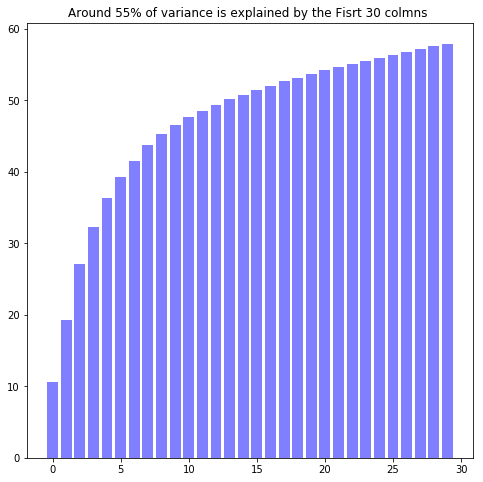

In [59]:
cum_sum = sklearn_pca.explained_variance_ratio_.cumsum()

sklearn_pca.explained_variance_ratio_[:10].sum()

cum_sum = cum_sum*100

fig, ax = plt.subplots(figsize=(8,8))
plt.bar(range(30), cum_sum, label='Cumulative _Sum_of_Explained _Varaince', color = 'b',alpha=0.5)
plt.title("Around 55% of variance is explained by the Fisrt 30 colmns ");

[]

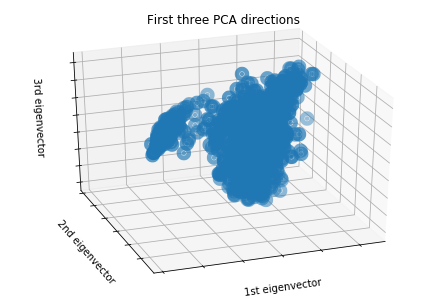

In [60]:
"""from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=3)
X_reduced  = sklearn_pca.fit_transform(X_std)
#Y=train['cat']
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], cmap=plt.cm.Paired,linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])"""

Text(0.5, 1.0, 'This is a 2D Representation of the 3D graph')

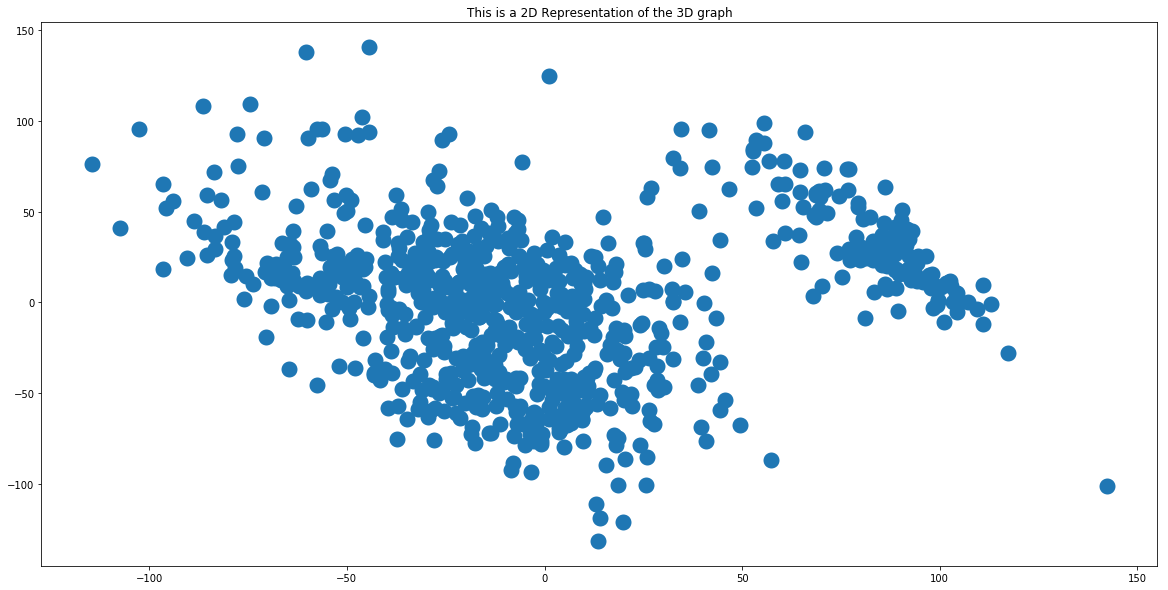

In [61]:
"""import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(1, figsize=(20,10))
plt.scatter(X_reduced[:, 0],  X_reduced[:, 1], cmap=plt.cm.Paired,linewidths=10)
#plt.annotate('See this separated cluster',xy=(-50,0),xytext=(-50,50),arrowprops=dict(facecolor='black', shrink=0.05))
#plt.annotate('See this big cluster',xy=(25,0),xytext=(50,50),arrowprops=dict(facecolor='black', shrink=0.05))
#plt.scatter(test_reduced[:, 0],  test_reduced[:, 1],c='r')
plt.title("This is a 2D Representation of the 3D graph")"""

In [62]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=30)
pca_fit = sklearn_pca.fit(X_std)
Y_sklearn = sklearn_pca.transform(X_std)
per_var = np.round(sklearn_pca.explained_variance_ratio_*100, decimals = 1)
var_labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]


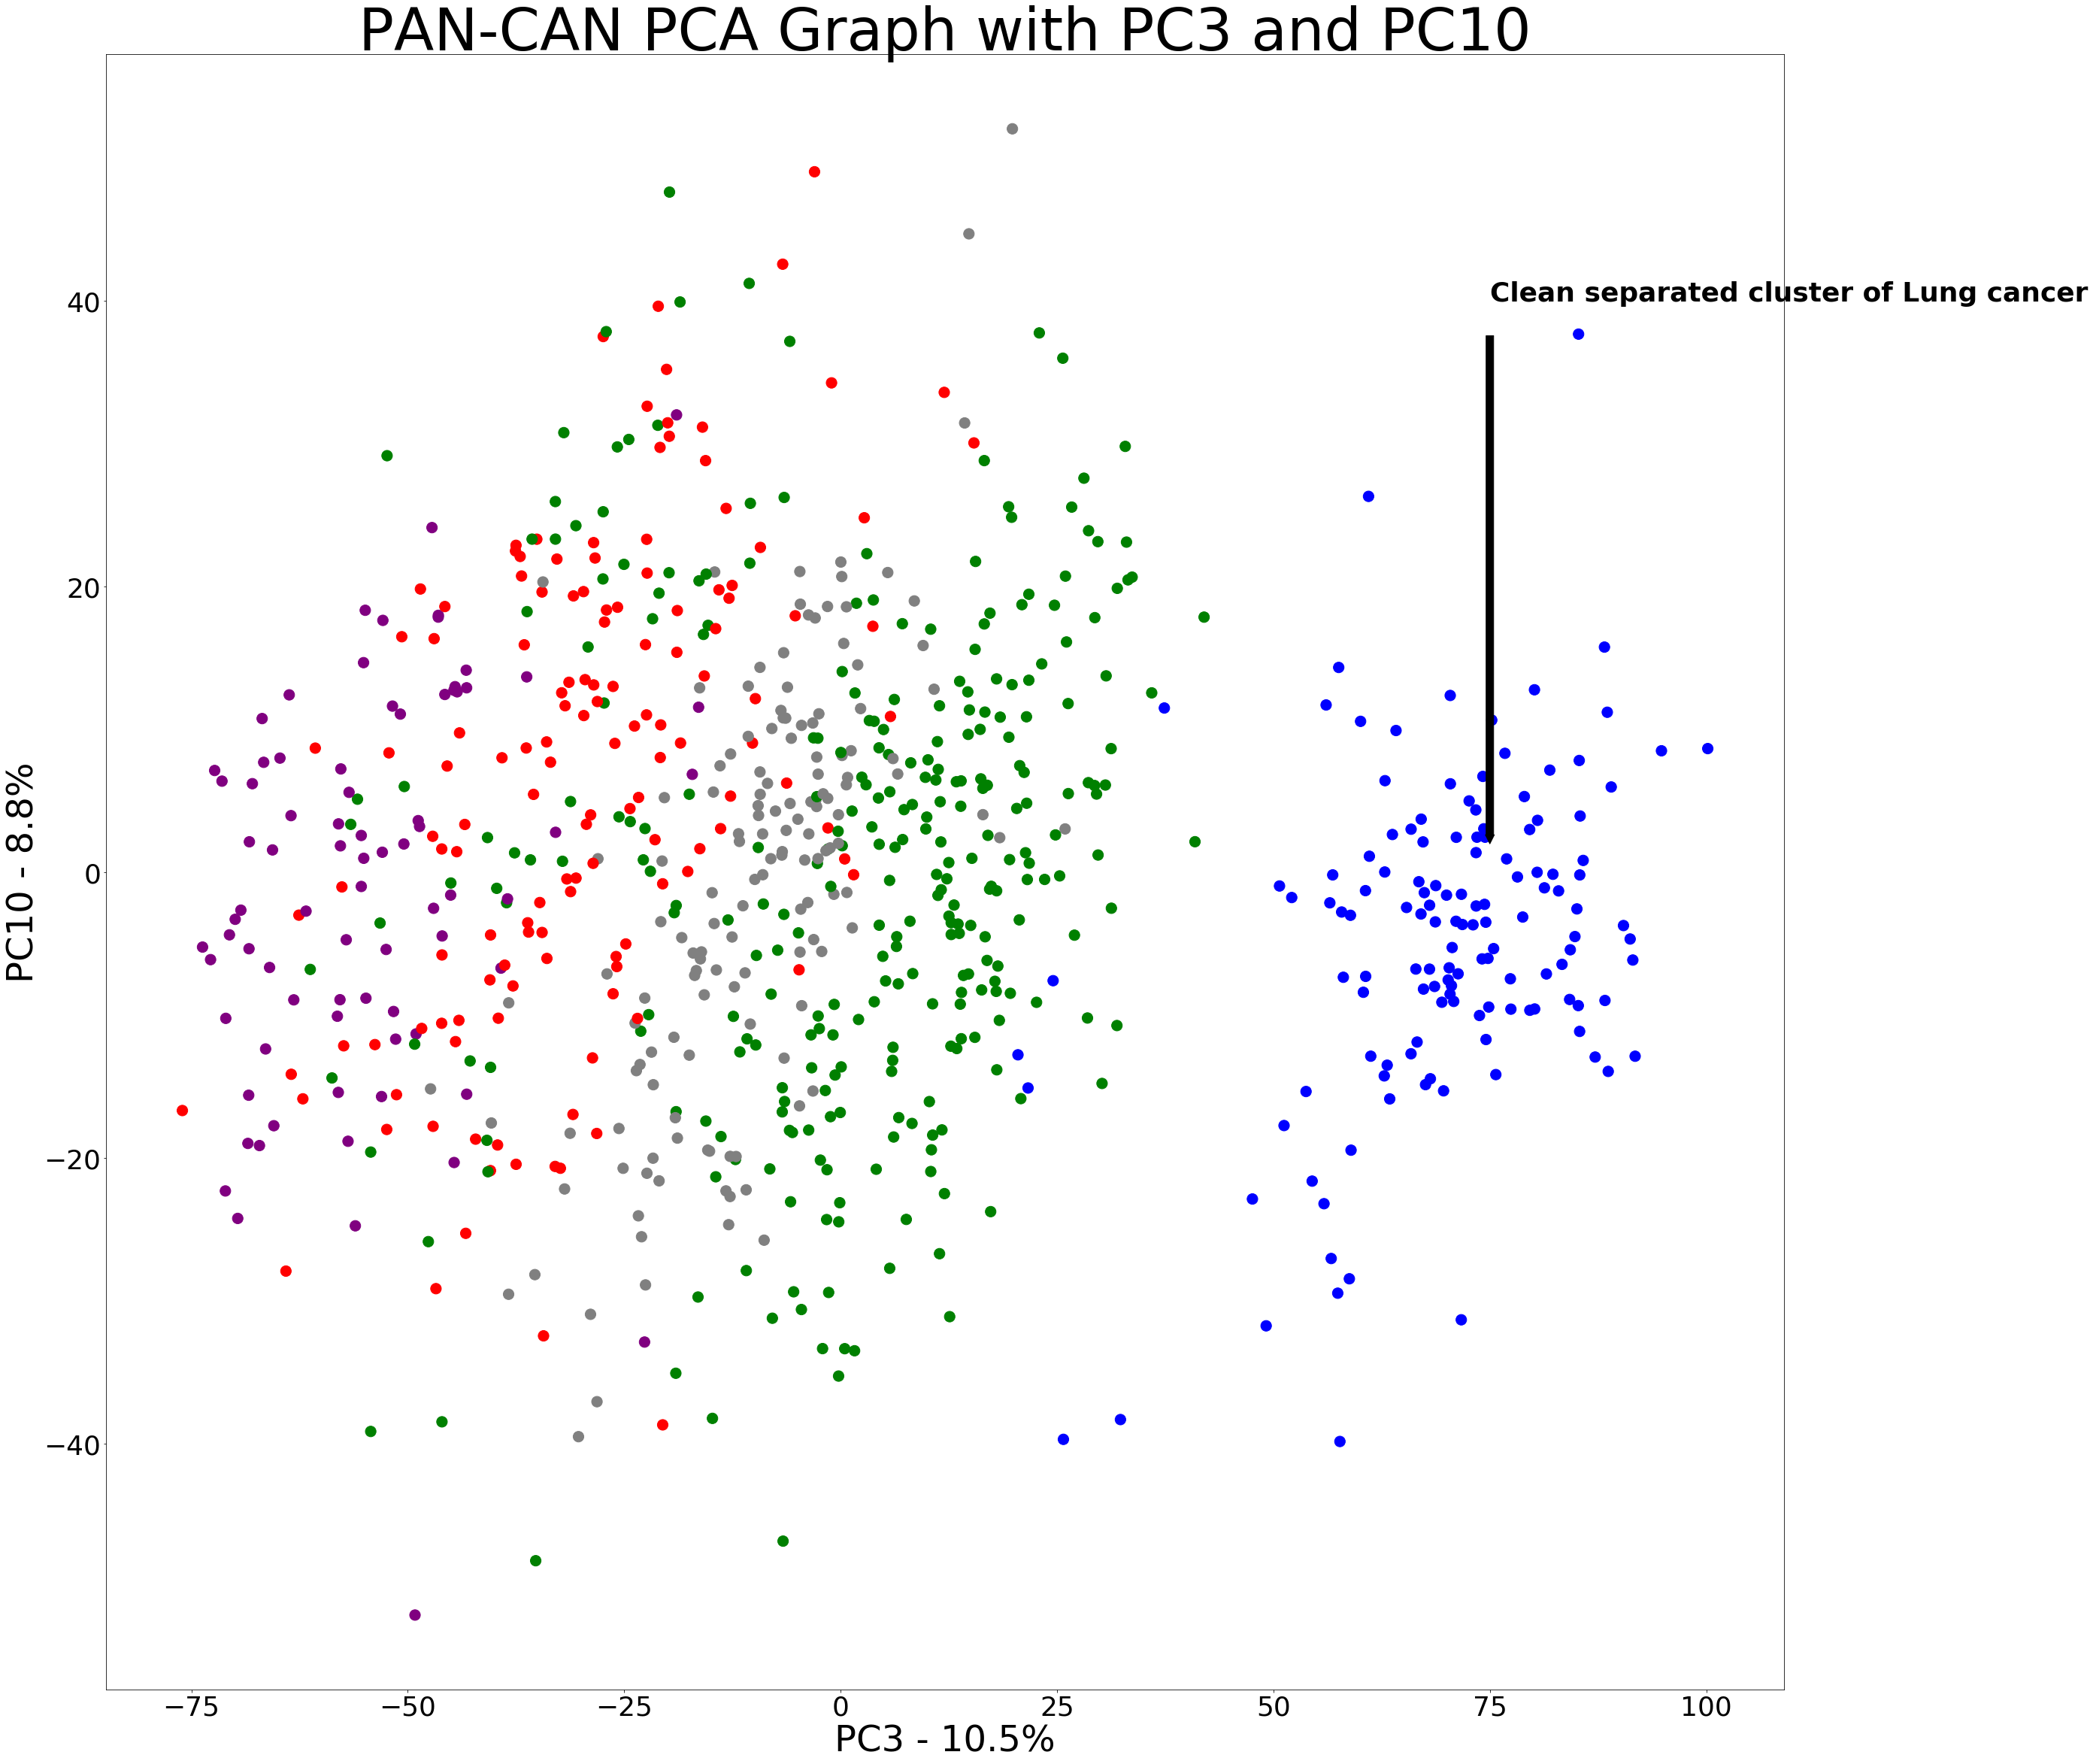

In [63]:
pca_30 = pd.DataFrame(Y_sklearn.astype(float), index = y, columns = var_labels)
plt.figure(figsize=(40,40))
plt.scatter(pca_30.PC3, pca_30.PC10, c = colors, s = 200)
plt.title("PAN-CAN PCA Graph with PC3 and PC10", size = 78)
plt.xlabel('PC3 - {0}%'.format(per_var[0]), size = 48)
plt.ylabel('PC10 - {0}%'.format(per_var[1]), size = 48)
plt.xticks(fontsize=36)
plt.yticks(fontsize = 36)
plt.annotate('Clean separated cluster of Lung cancer',xy=(75,0), weight = 'heavy', xytext=(75,40),size=36, arrowprops=dict(facecolor='black', 
                                                                                                                           width = 10, shrink=0.05))
#plt.annotate('Another mildly separated cluster of breast cancer',xy=(0,-75),xytext=(-50,-100),size=36, arrowprops=dict(facecolor='black', shrink=0.05))

"""for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], 
                          pca_df.PC2.loc[sample]))"""
plt.show()

In [90]:
pca_30 = pd.DataFrame(Y_sklearn.astype(float), index = y, columns = var_labels)
plt.figure(figsize=(40,40))
plt.scatter(pca_30.PC3, pca_30.PC10, c = colors, s = 200)
plt.title("PAN-CAN PCA Graph with PC3 and PC10", size = 78)
plt.xlabel('PC3 - {0}%'.format(per_var[3]), size = 48)
plt.ylabel('PC10 - {0}%'.format(per_var[10]), size = 48)
plt.xticks(fontsize=36)
plt.yticks(fontsize = 36)
arrowprops=dict(arrowstyle='->',
                    linewidth=2)
plt.annotate('Clean separated cluster of Lung cancer',xy=(75,0), weight = 'heavy', xytext=(75,40),size=36, 
             arrowprops=dict(arrowstyle = '->', color='black', linewidth = 10))



plt.show()

NameError: name 'Y_sklearn' is not defined

In [65]:
# PC3 and PC10 contain markers of Lung cancer while PC1 and PC2 contain markers of kidney cancer!

In [41]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [42]:
X_2d = tsne.fit_transform(X)

In [89]:
# tsne_exp[:,1]

PRAD
LUAD
BRCA
COAD
KIRC


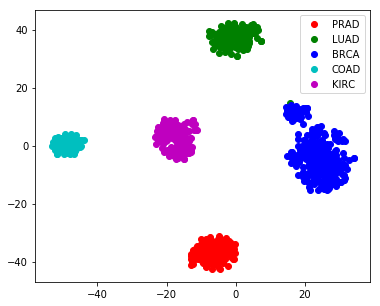

In [43]:
# tSNE plot with cancer cells labeled in individual colors
target_names = ['PRAD', 'LUAD', 'BRCA', 'COAD', 'KIRC']
target_ids = range(len(y))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
color_ids = 'r', 'g', 'b', 'c', 'm'
for i, c, label in zip(target_names, color_ids, target_names):
    print(i)
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

In [88]:
# sns.clustermap(X_2d, figsize = (20, 20))

In [87]:
X_df = pd.DataFrame(X_2d) # convert tSNE to dataframe for input to clustermap with cancer correlation

{'PRAD': 'r', 'LUAD': 'g', 'BRCA': 'b', 'KIRC': 'm', 'COAD': 'c'}


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

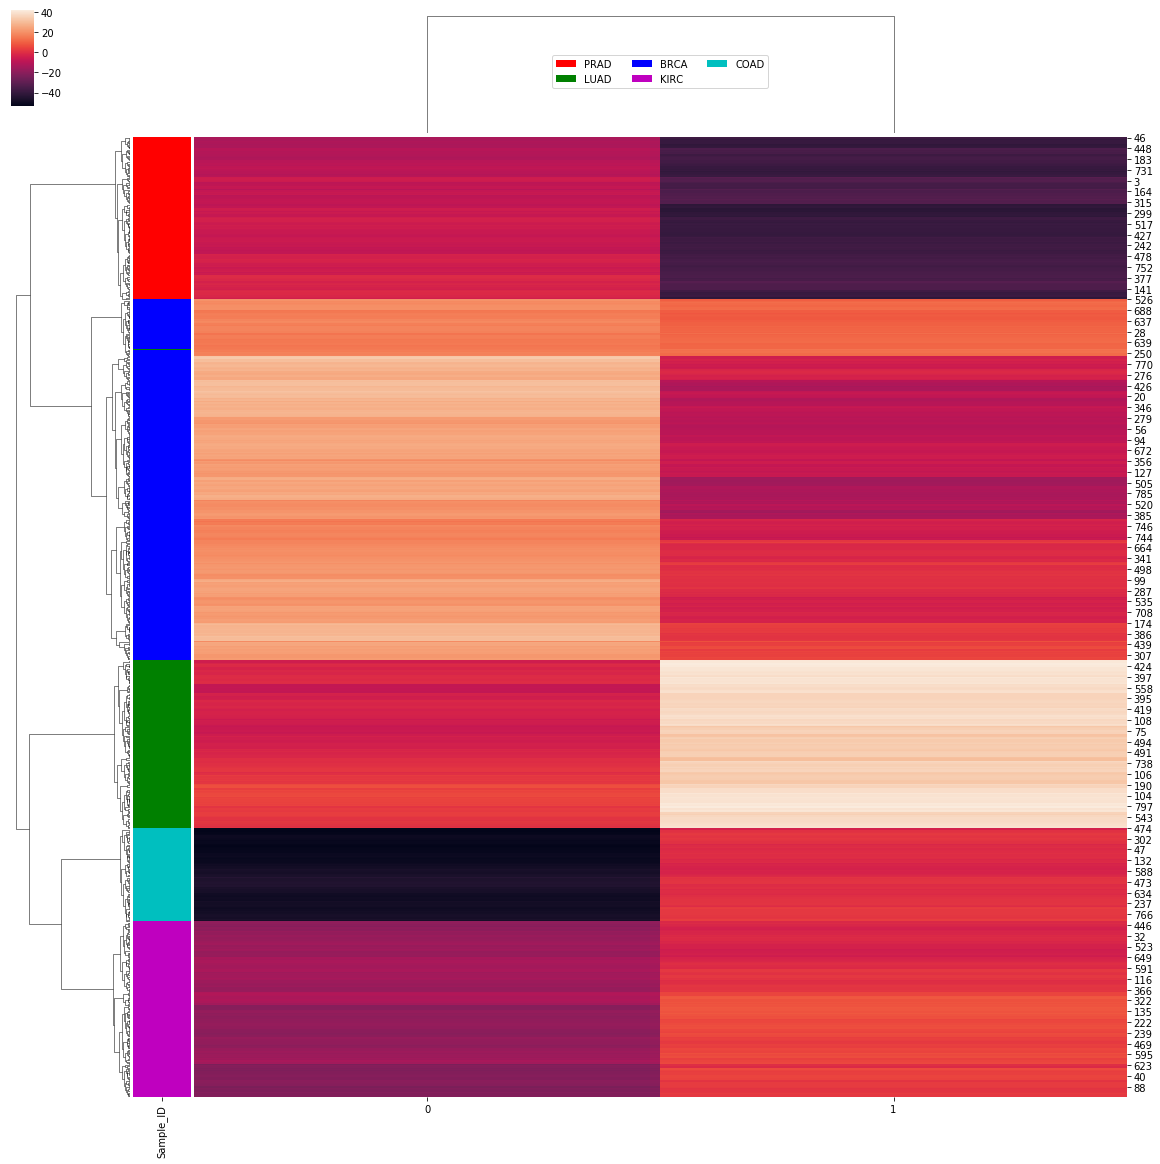

In [85]:
import matplotlib.patches as mpatches
lut = dict(zip(sc_df['Sample_ID'].unique(), "rgbmc")) # Dictionary with cancers and colors
print(lut)
row_colors = y.map(lut)
g = sns.clustermap(X_df, row_colors = row_colors, figsize = (20,20)) # Clustermap of gene expression data by tSNE
for (label, colour) in lut.items():
    # Make long label
    g.ax_col_dendrogram.bar(0, 0, color=colour, label=label)
g.ax_col_dendrogram.legend(loc="center", ncol=3) # includes cancer labels as legend
plt.tight_layout